<a href="https://colab.research.google.com/github/enzo-augusto/Serial-Buffon-s-Needle/blob/main/EP1_EnzoAugustoPinto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ep. 1: Agulha de Buffon


Na primeira versão do código gerei apenas um valor de pi

In [ ]:
%%writefile versao1.c

//Versão 1.0 do código. Gera apenas um valor de PI.

#include <stdio.h>
#include <stdlib.h>
#include <time.h>
#include <math.h>

double gera_random (double inicio_intervalo, double tamanho_intervalo){


    return ((double) rand()/(double) RAND_MAX)* tamanho_intervalo + inicio_intervalo;
}

int main()
{
  srand(time(0));
  int lancamentos = 100000000;
  int acertos = 0;
  double pi;
  double erroReal;
  double erroExp;


      for(int i = 0; i <= lancamentos; i++){

        double centro = gera_random(0, 1 );

        double angulo = gera_random(0, M_PI_2);

        if( cos(angulo)/2 >= centro){

        acertos++;

        }
      }

        pi = (double) lancamentos/(double) acertos;
        erroReal = fabs(M_PI - pi);
        erroExp = pi/sqrt((double) lancamentos);


        printf("Apos %d lancamentos, encontramos o valor %lf para pi, com erro experimental %lf e erro real %lf \n", lancamentos, pi, erroExp,  erroReal);

}


Writing versao1.c


In [ ]:
!gcc versao1.c -o versao1.out -lm
!./versao1.out

Apos 100000000 lancamentos, encontramos o valor 3.141661 para pi, com erro experimental 0.000314 e erro real 0.000068 


# Cálculo de $ π $ com 14 casas decimais

Para conseguir um valor de pi com 14 casas decimais, nosso erro deve ser da ordem de $10^{-15}$. Utilizando nossa expressão $ r*N^{-1/2} $ vemos que N precisa ser próximo de $10^{30} $ . Meu computador calculou $ π $ com $ N = 10^{8} $ em cerca de 10 segundos, ou seja, para chegar em um valor de $ π $ com 14 casas decimais meu computador levaria aproximadamente $ (10^{30}/10^{8}) *10 = 10^{23} $ segundos, ou cerca de $ 10^{16} $ anos.

In [ ]:
%%writefile versao2.c

/*Versão 2.0 do código. Gera cem valores de pi com diferentes números de lancamentos,
calcula e plota o erro experimental, o erro real e o número de lancamentos para cada valor de pi */


/*Versao 2.0 do codigo. Gera diversos valores de pi com diferentes numeros de lancamentos,
calcula e plota o erro experimental, o erro real e o número de lancamentos para cada valor de pi */

#include <stdio.h>
#include <stdlib.h>
#include <time.h>
#include <math.h>

// gera floats aleatorios dentro de um intervalo dado
double gera_random (double inicio_intervalo, double tamanho_intervalo){


    return ((double) rand()/(double) RAND_MAX)* tamanho_intervalo + inicio_intervalo;
}

int main()
{

  srand(time(0));
  int lancamentos;
  int acertos = 0;
  double pi;
  double erroReal;
  double erroExp;
  double diferenca;

//O for interno é identico ao utilizado na versao 1.0 para gerar um valor de pi.
//O for externo varia o numero de lancamentos, gerando 100 dados. Iniciar lancamentos com mais de 10^6 demora demais para gerar 100 dados
for(lancamentos=100000; lancamentos <= 10000000; lancamentos = lancamentos + 100000){

    acertos = 0;

      for(int i = 0; i <= lancamentos; i++){

        double centro = gera_random(0, 1 );

        double angulo = gera_random(0, M_PI_2);

        if( cos(angulo)/2 >= centro){

        acertos++;

        }

      }
        pi = (double) lancamentos/(double) acertos;
        erroReal = fabs(M_PI - pi);
        erroExp = pi/sqrt((double) lancamentos);
        diferenca = fabs(erroReal - erroExp);


        printf("%d  %lf  %lf  %lf  %lf \n", lancamentos, pi, erroExp, erroReal, diferenca);
}



    return 0;
}


Writing versao2.c


In [ ]:
!gcc versao2.c -o versao2.out -lm
!./versao2.out

100000  3.143270  0.009940  0.001678  0.008262 
200000  3.152784  0.007050  0.011191  0.004141 
300000  3.131459  0.005717  0.010134  0.004417 
400000  3.135878  0.004958  0.005715  0.000757 
500000  3.141927  0.004443  0.000334  0.004109 
600000  3.140391  0.004054  0.001201  0.002853 
700000  3.132496  0.003744  0.009097  0.005353 
800000  3.141197  0.003512  0.000396  0.003116 
900000  3.140627  0.003311  0.000966  0.002345 
1000000  3.138308  0.003138  0.003284  0.000146 
1100000  3.139825  0.002994  0.001768  0.001226 
1200000  3.136443  0.002863  0.005150  0.002286 
1300000  3.140999  0.002755  0.000593  0.002162 
1400000  3.140992  0.002655  0.000600  0.002054 
1500000  3.142052  0.002565  0.000460  0.002106 
1600000  3.133311  0.002477  0.008282  0.005805 
1700000  3.142660  0.002410  0.001067  0.001343 
1800000  3.144467  0.002344  0.002875  0.000531 
1900000  3.149293  0.002285  0.007700  0.005416 
2000000  3.140985  0.002221  0.000608  0.001613 
2100000  3.143402  0.002169  

#Gráficos gerados pela versão 2.0

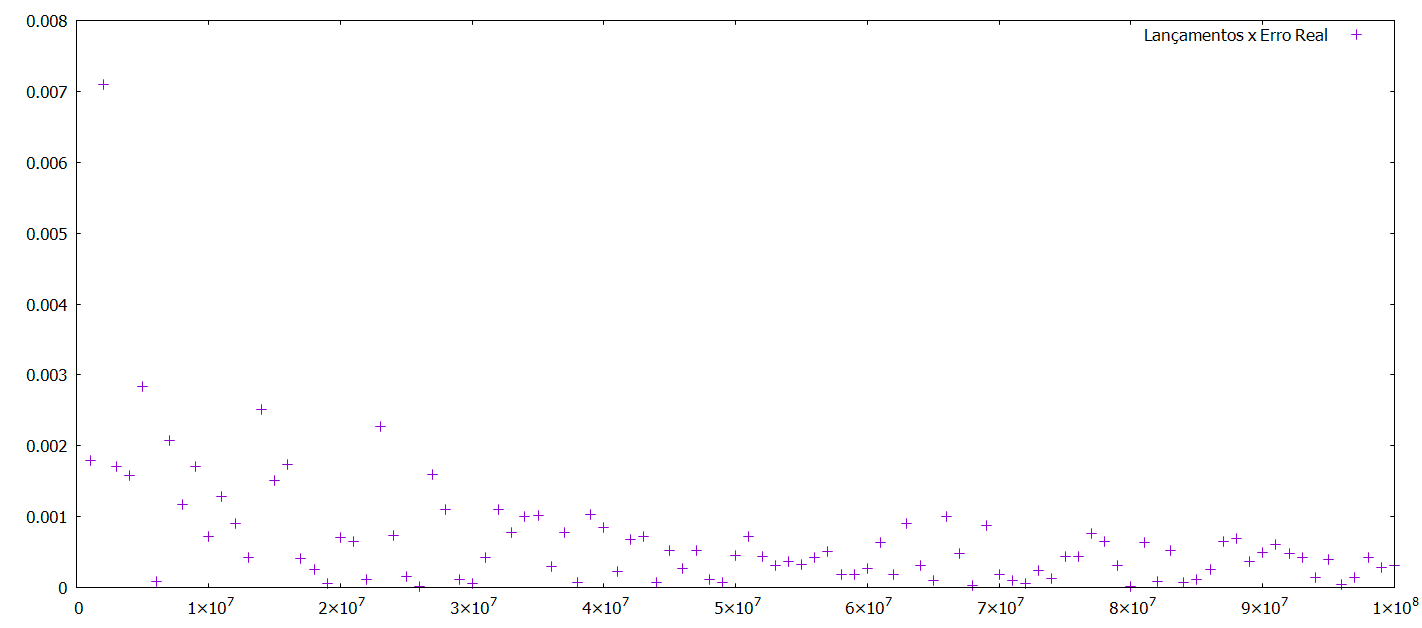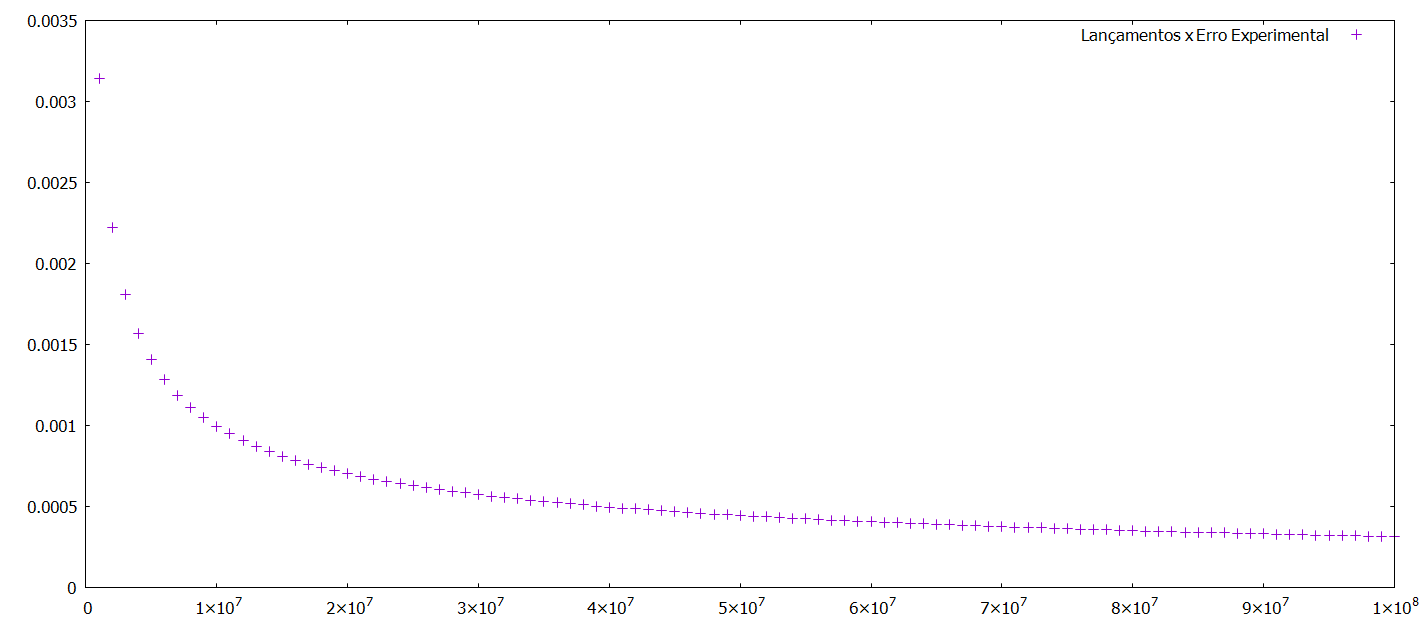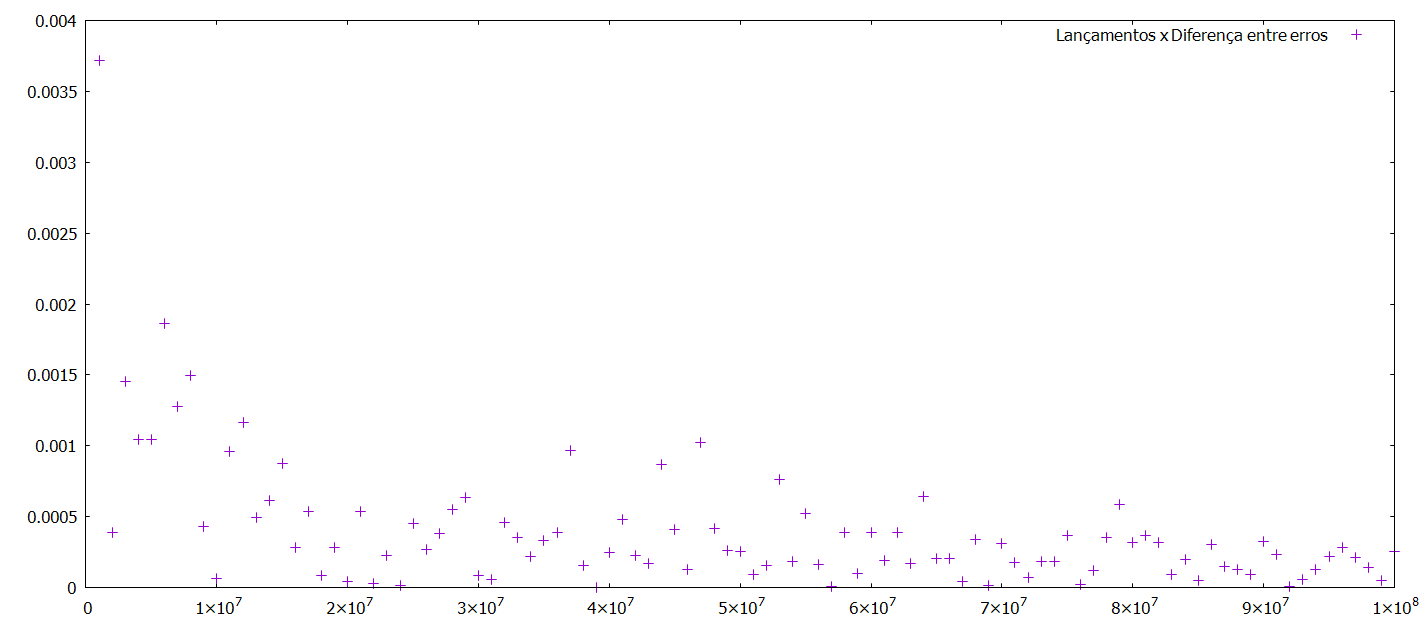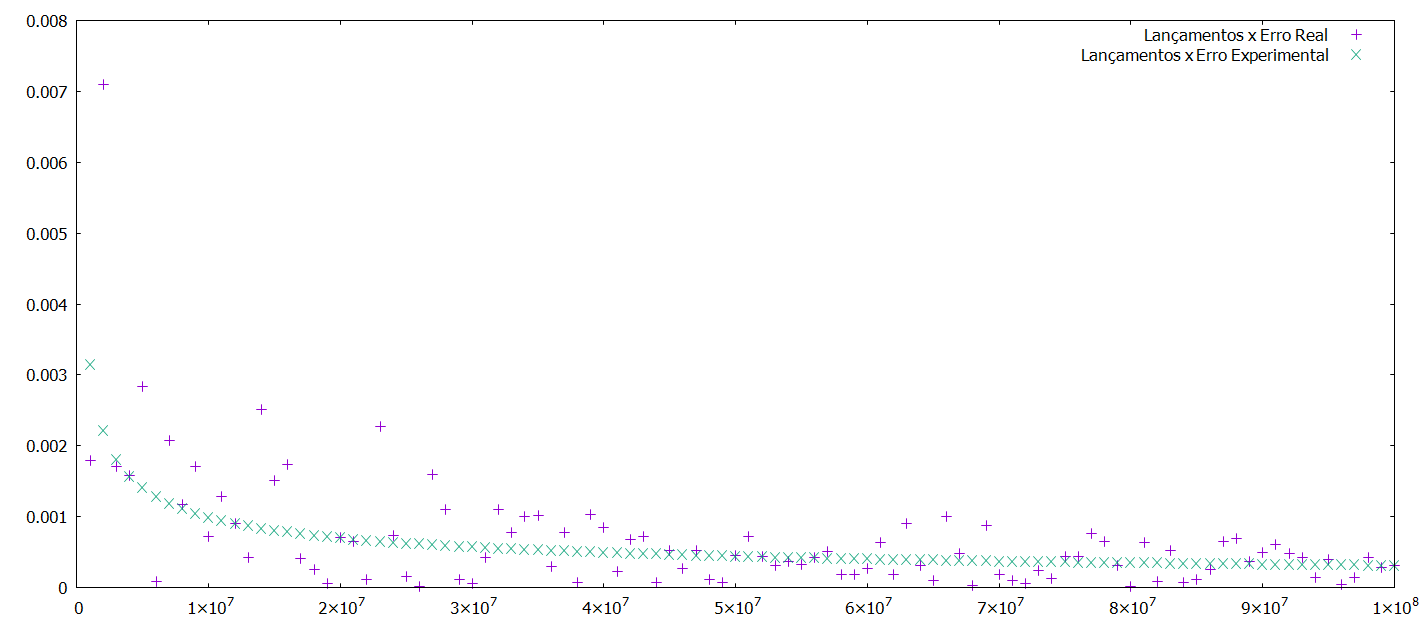

 Vemos que o ajuste não é perfeito, mas se aproxima o suficiente, principalmente para valores grandes de lançamentos.

#Gráficos em escala log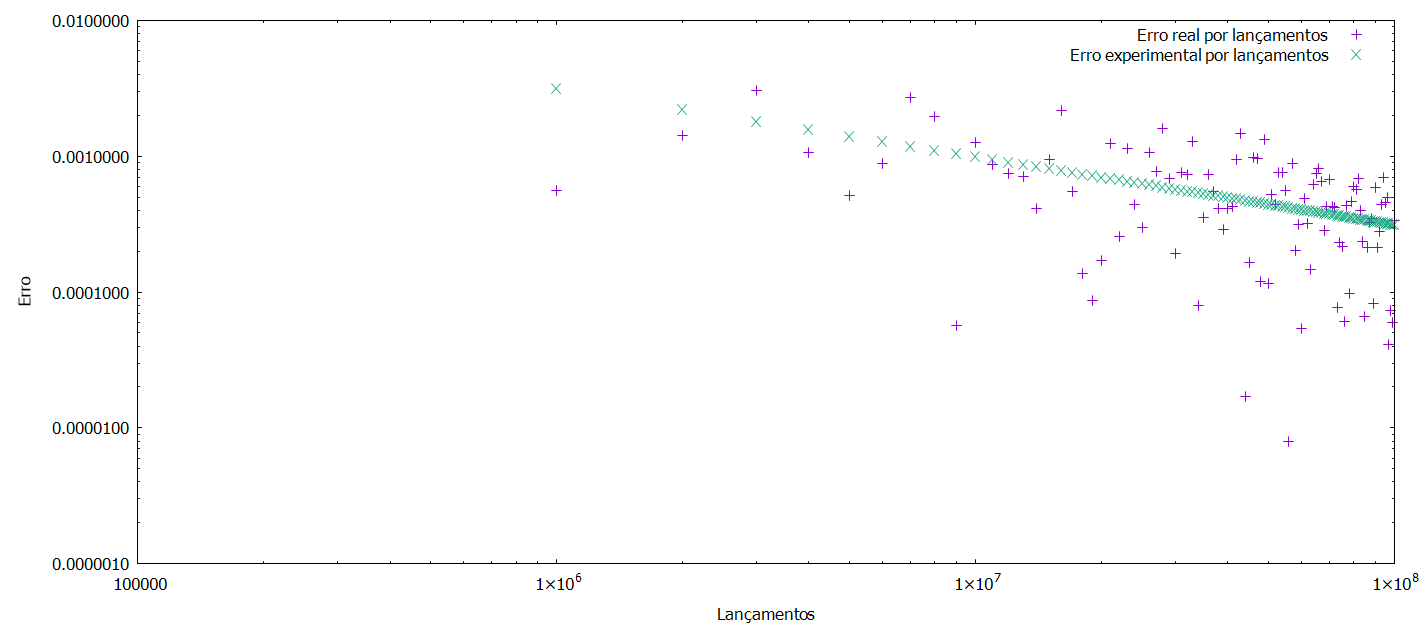
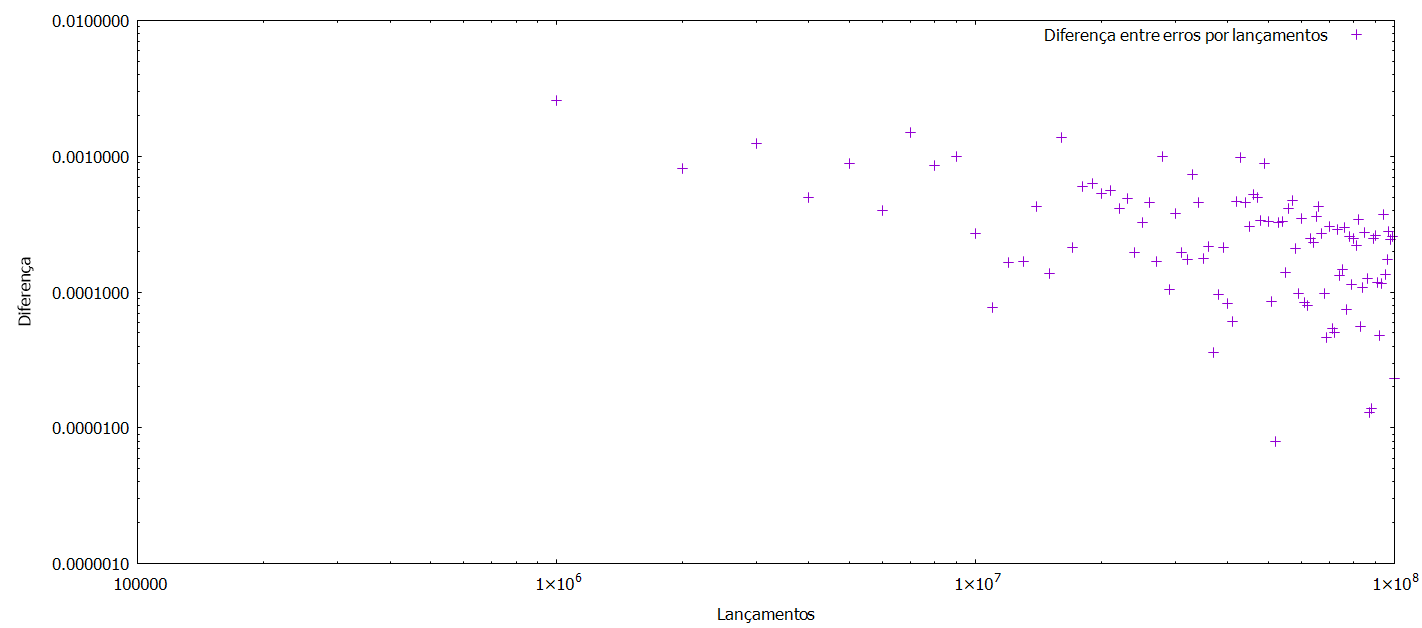